# Speech Recognition - AITAMALIK Amine

In [1]:
import numpy as np
import pvml
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

# I. Preparing Data 

In [2]:
words = open("classes.txt").read().split()

X_train, Y_train = np.load("train.npz").values()
X_test, Y_test = np.load("test.npz").values()

### Spectrogram Example

Text(0.5, 1.0, 'one')

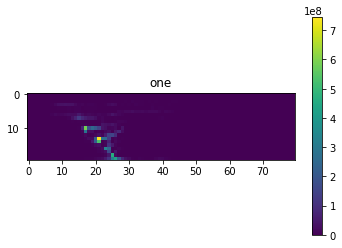

In [5]:
image = X_test[5555, :].reshape(20, 80)

plt.imshow(image)
plt.colorbar()
plt.title(words[Y_test[5555]])

## Reducing the number of classes to 10

In [5]:
X_train_10 = X_train[Y_train < 10, :]
Y_train_10 = Y_train[Y_train < 10]

X_test_10 = X_test[Y_test < 10, :]
Y_test_10 = Y_test[Y_test < 10]

# II. Feature Normalization

### Standardization

In [6]:
mu = X_train_10.mean(0)
sigma = X_train_10.std(0)

In [7]:
X_train_10_standard = (X_train_10 - mu) / sigma
X_test_10_standard = (X_test_10 - mu) / sigma

### Normalization

#### L1

In [8]:
def l1_normalization(x):
    q = np.abs(x).sum(1, keepdims = True)
    q = np.maximum(q, 1e-15) 
    x = x / q
    
    return x

In [9]:
X_train_10_norm = l1_normalization(X_train_10)
X_test_10_norm = l1_normalization(X_test_10)

#### L2

In [10]:
def l2_normalization(x):
    q = np.sqrt((x ** 2).sum(1, keepdims = True))
    q = np.maximum(q, 1e-15) 
    x = x / q
    
    return x

In [11]:
X_train_10_norm2 = l2_normalization(X_train_10)
X_test_10_norm2 = l2_normalization(X_test_10)

# III. Simple NN without hidden layers

### Helper Functions

In [12]:
def accuracy(net, X, Y):
    labels, probas = net.inference(X)
    accuracy = (labels == Y).mean()
    
    return accuracy

In [13]:
def mlp(train_data, test_data, model, steps, graph_title, batch=None):
    
    train_accs = [] 
    test_accs = []
    
    for epoch in  range(100):
        model.train(
            train_data,
            Y_train_10,
            1e-4,
            steps=steps,
            batch=batch
        )
    
        if epoch % 10 == 0:
            train_acc = accuracy(
                model,
                train_data,
                Y_train_10
            )
            test_acc = accuracy(
                model,
                test_data,
                Y_test_10
            )

            train_accs.append(train_acc * 100)
            test_accs.append(test_acc * 100)
        
            print(
                epoch,
                train_acc * 100,
                test_acc * 100
            )

    plt.plot(train_accs)
    plt.plot(test_accs)
    plt.title(graph_title)
    plt.ylabel("Accuracy in %")
    plt.xlabel("Epochs")
    plt.legend(["train", "test"])

## A) Stochastic MLP

In [14]:
net = pvml.MLP([
    1600, # first layer : number of inputs (pixels) 
    10 # output layer : nb of classes
])

0 6.717927964386888 7.649769585253456
10 6.874747065965196 7.92626728110599
20 7.158033184945365 8.248847926267281
30 7.5222581950627285 8.986175115207374
40 8.311412383650344 9.723502304147466
50 9.616552003237555 11.382488479262673
60 12.231889923108055 13.225806451612904
70 13.875961149332255 14.23963133640553
80 15.71732092270336 16.359447004608295
90 17.98360987454472 18.018433179723502


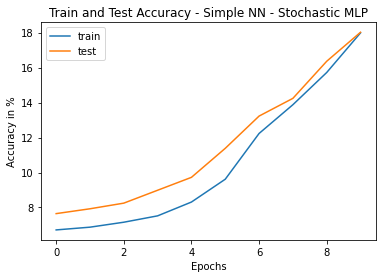

In [24]:
mlp(
    train_data=X_train_10_standard,
    test_data=X_test_10_standard,
    model=net,
    steps=1,
    batch=None,
    graph_title="Train and Test Accuracy - Simple NN - Stochastic MLP"
)

## B) Batch MLP

0 39.918049372723594 36.405529953917046
10 45.81647106434642 35.2073732718894
20 49.37272359368677 37.6036866359447
30 50.227640631323354 36.54377880184332
40 51.87677053824362 39.35483870967742
50 48.431808984216914 36.175115207373274
60 54.057061918251726 39.21658986175115
70 51.72501011736139 39.03225806451613
80 49.140024281667344 37.235023041474655
90 54.785511938486444 39.953917050691246


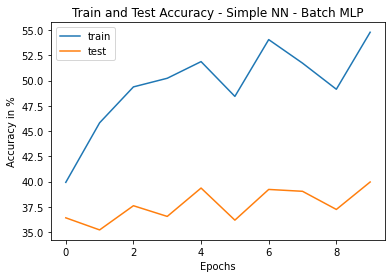

In [26]:
mlp(
    train_data=X_train_10_standard,
    test_data=X_test_10_standard,
    model=net,
    steps=10000,
    batch=1,
    graph_title="Train and Test Accuracy - Simple NN - Batch MLP"
)

## C) Mini Batch MLP

0 59.39902873330636 43.41013824884792
10 61.94354512343181 42.07373271889401
20 62.90975313638203 41.9815668202765
30 63.901254552812624 42.48847926267281
40 63.92148927559692 42.3963133640553
50 64.21995143666531 42.30414746543779
60 64.23006879805747 42.07373271889401
70 64.50323755564548 42.16589861751152
80 64.59935248887089 41.65898617511521
90 64.94334277620396 41.42857142857143


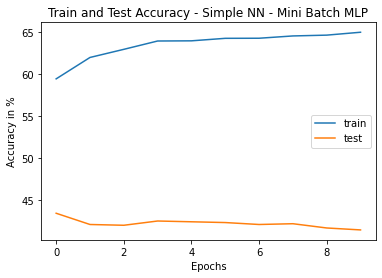

In [27]:
mlp(
    train_data=X_train_10_standard,
    test_data=X_test_10_standard,
    model=net,
    steps=1000,
    batch=10,
    graph_title="Train and Test Accuracy - Simple NN - Mini Batch MLP"
)

# IV. Hidden Network - One Layer

In [15]:
one_hidden_net = pvml.MLP([
    1600,
    300,
    10
])

## A) Stochastic MLP

0 8.574463779846216 9.12442396313364
10 8.78186968838527 9.308755760368664
20 9.328207203561313 10.0
30 10.274180493727236 11.105990783410139
40 11.26568191015783 12.304147465437788
50 12.35329825981384 12.903225806451612
60 13.77984621610684 13.870967741935484
70 15.236746256576286 14.377880184331799
80 16.718939700526104 15.023041474654377
90 18.499595305544315 16.958525345622117


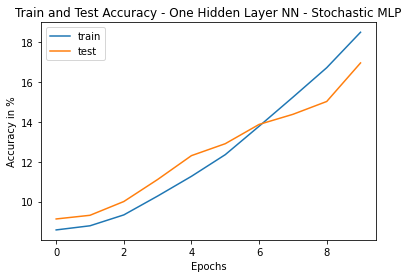

In [29]:
mlp(
    train_data=X_train_10_standard,
    test_data=X_test_10_standard,
    model=one_hidden_net,
    steps=1,
    batch=None,
    graph_title="Train and Test Accuracy - One Hidden Layer NN - Stochastic MLP"
)

## B) Mini Batch MLP

0 38.11715904492108 34.47004608294931
10 67.58903278025092 52.07373271889401
20 76.63901254552813 56.451612903225815
30 79.83609874544719 57.41935483870968
40 80.98441926345609 57.096774193548384
50 83.76163496560098 60.13824884792627
60 87.07001214083367 61.566820276497694
70 87.71752326993119 60.78341013824885
80 89.50829623634156 62.995391705069125
90 89.31606636989073 62.857142857142854


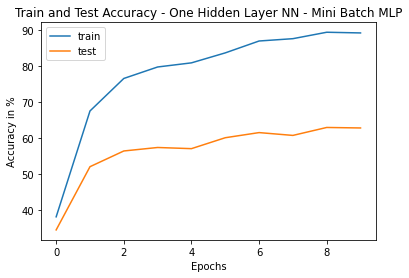

In [17]:
mlp(
    train_data=X_train_10_standard,
    test_data=X_test_10_standard,
    model=one_hidden_net,
    steps=1000,
    batch=10,
    graph_title="Train and Test Accuracy - One Hidden Layer NN - Mini Batch MLP"
)

#  V. Hidden Network - Three Hidden Layers

In [16]:
three_hidden_net = pvml.MLP([
    1600,
    200,
    100,
    50,
    10
])

## A) Stochastic MLP

0 7.0973290165924725 5.668202764976959
10 7.486847430190206 6.0368663594470044
20 7.972480777013355 6.589861751152074
30 8.670578713071631 8.248847926267281
40 9.834075273168757 10.046082949308756
50 10.860987454471873 11.152073732718893
60 12.059894779441521 11.889400921658986
70 14.149129906920274 14.88479262672811
80 16.36483205180089 16.31336405529954
90 18.024079320113316 17.28110599078341


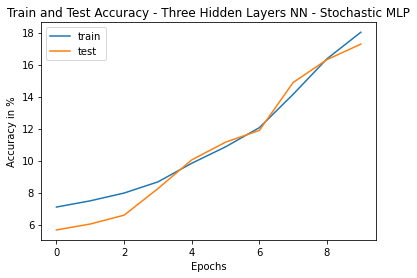

In [168]:
mlp(
    train_data=X_train_10_standard,
    test_data=X_test_10_standard,
    model=three_hidden_net,
    steps=1,
    batch=None,
    graph_title="Train and Test Accuracy - Three Hidden Layers NN - Stochastic MLP"
)

## B) Mini Batch MLP

0 35.91663294212869 33.31797235023041
10 64.94840145690004 48.38709677419355
20 77.33711048158641 56.635944700460826
30 83.74645892351275 60.46082949308755
40 81.08053419668151 57.41935483870968
50 87.60117361392149 59.40092165898617
60 83.220356131121 54.516129032258064
70 81.38405503844596 56.58986175115207
80 90.40874140024282 62.02764976958526
90 88.42573856738163 59.63133640552996


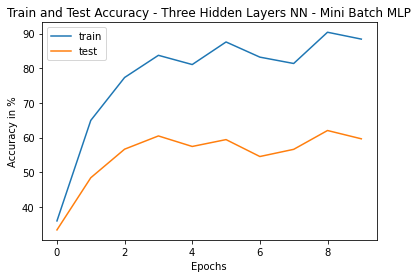

In [169]:
mlp(
    train_data=X_train_10_standard,
    test_data=X_test_10_standard,
    model=three_hidden_net,
    steps=1000,
    batch=10,
    graph_title="Train and Test Accuracy - Three Hidden Layers NN - Mini Batch MLP"
)

#### Mini-batch is the most efficient model. Therefore, from now on we shall only compare results using this technique.

# VI. Normalized Data

## A) L1 NORMALIZED

### Simple NN

0 18.094900849858355 18.064516129032256
10 28.945770942938083 28.986175115207374
20 30.377377579927156 30.276497695852534
30 28.637191420477535 28.617511520737327
40 29.992917847025495 30.046082949308754
50 30.003035208417643 29.677419354838708
60 29.932213678672603 30.046082949308754
70 35.066774585188185 35.06912442396313
80 30.39761230271145 30.0
90 29.810805341966816 29.539170506912445


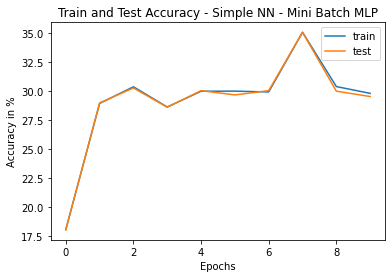

In [170]:
mlp(
    train_data=X_train_10_norm,
    test_data=X_test_10_norm,
    model=net,
    steps=1000,
    batch=10,
    graph_title="Train and Test Accuracy - Simple NN - Mini Batch MLP"
)

### Hidden NN - One Layer

0 16.334479967624443 16.036866359447004
10 32.390732496964795 32.165898617511516
20 31.24747065965196 31.61290322580645
30 31.738162687171183 32.48847926267281
40 32.32496964791582 32.764976958525345
50 34.98583569405099 35.483870967741936
60 35.00101173613921 36.3594470046083
70 37.7782274382841 38.84792626728111
80 38.98219344394982 39.40092165898618
90 40.3126264670174 40.09216589861751


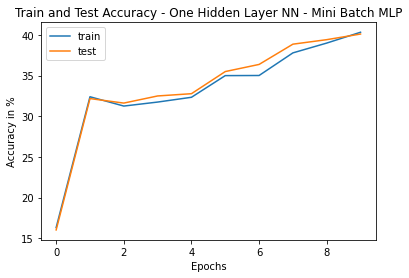

In [171]:
mlp(
    train_data=X_train_10_norm,
    test_data=X_test_10_norm,
    model=one_hidden_net,
    steps=1000,
    batch=10,
    graph_title="Train and Test Accuracy - One Hidden Layer NN - Mini Batch MLP"
)

### Hidden NN - 3 Layers

0 17.457507082152972 17.695852534562214
10 33.7565762849049 35.52995391705069
20 33.53399433427762 33.36405529953917
30 38.47632537434237 39.86175115207373
40 44.71873735329826 44.56221198156682
50 32.213678672602185 32.35023041474655
60 42.993727235936866 43.17972350230414
70 44.212869283690814 41.705069124423964
80 47.60724403075678 45.622119815668206
90 48.17887494941319 47.32718894009217


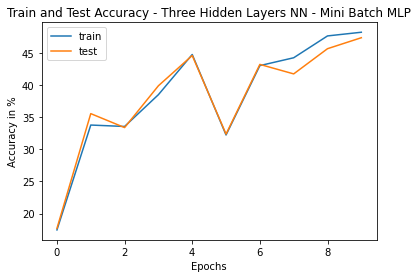

In [172]:
mlp(
    train_data=X_train_10_norm,
    test_data=X_test_10_norm,
    model=three_hidden_net,
    steps=1000,
    batch=10,
    graph_title="Train and Test Accuracy - Three Hidden Layers NN - Mini Batch MLP"
)

## B) L2 NORMALIZED

### Simple NN

0 37.33812221772562 36.82027649769585
10 40.44415216511534 39.40092165898618
20 42.03257790368272 41.244239631336406
30 43.25677863213274 42.35023041474654
40 44.07122622420073 43.364055299539174
50 44.8097936058276 43.77880184331797
60 45.31060299473897 44.23963133640553
70 45.9581141238365 44.423963133640555
80 46.53986240388507 45.25345622119816
90 46.83832456495346 45.25345622119816


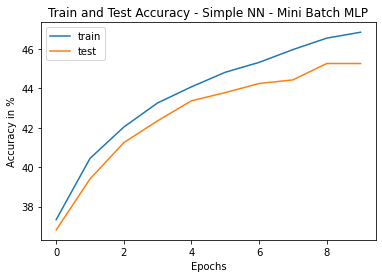

In [173]:
mlp(
    train_data=X_train_10_norm2,
    test_data=X_test_10_norm2,
    model=net,
    steps=1000,
    batch=10,
    graph_title="Train and Test Accuracy - Simple NN - Mini Batch MLP"
)

### Hidden NN - One Layer

0 47.799473897207605 46.49769585253456
10 65.72237960339945 60.0
20 69.36462970457305 61.6589861751152
30 72.33913395386483 63.64055299539171
40 74.83812221772563 65.16129032258064
50 75.83468231485229 65.29953917050692
60 78.07061918251719 66.72811059907833
70 79.2391744233104 66.77419354838709
80 80.76689599352488 67.23502304147465
90 81.96074463779847 67.92626728110599


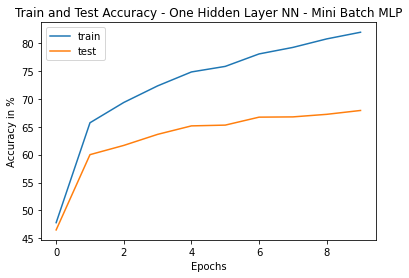

In [174]:
mlp(
    train_data=X_train_10_norm2,
    test_data=X_test_10_norm2,
    model=one_hidden_net,
    steps=1000,
    batch=10,
    graph_title="Train and Test Accuracy - One Hidden Layer NN - Mini Batch MLP"
)

### Hidden NN - 3 Layers

0 51.537838931606636 49.67741935483871
10 73.93261837312829 63.732718894009224
20 82.70437070012142 65.9447004608295
30 87.89457709429381 66.3594470046083
40 90.98543099959531 66.17511520737327
50 94.25333872925941 66.95852534562212
60 96.55503844597328 66.72811059907833
70 96.68150546337515 65.80645161290323
80 99.30696074463779 67.41935483870968
90 99.2057871307163 66.86635944700461


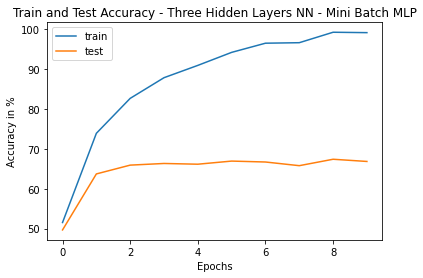

In [175]:
mlp(
    train_data=X_train_10_norm2,
    test_data=X_test_10_norm2,
    model=three_hidden_net,
    steps=1000,
    batch=10,
    graph_title="Train and Test Accuracy - Three Hidden Layers NN - Mini Batch MLP"
)

# VII. Confusion Matrices

## A) Simple NN

In [219]:
def conf_mat(model):
    labels, probas = model.inference(X_test_10_norm2)
    conf_matrix = np.zeros((10, 10))

    for i in range(X_test_10_norm2.shape[0]):
        conf_matrix[Y_test_10[i], labels[i]] += 1

    conf_matrix = conf_matrix / conf_matrix.sum(1, keepdims=True)
    
    return conf_matrix

In [221]:
conf_matrix = conf_mat(net)

In [222]:
print("Confusion Matrix - Simple NN".center(90))
print()
print()

print(" " * 10, end="")

for j in range(10):
    print("%6.9s" % words[j][:3], end="  ")
print()
print()

for i in range(10):
    print("%10s" % words[i], end="   ")
    
    for j in range(10):
        print("%.3f" % conf_matrix[i, j], end="   ")
    print()
    
    print()

                               Confusion Matrix - Simple NN                               


             bac     bed     bir     cat     dog     dow     eig     fiv     fol     for  

  backward   0.042   0.034   0.093   0.093   0.042   0.153   0.161   0.288   0.059   0.034   

       bed   0.020   0.172   0.126   0.096   0.015   0.237   0.167   0.146   0.015   0.005   

      bird   0.011   0.071   0.335   0.027   0.011   0.143   0.275   0.033   0.022   0.071   

       cat   0.005   0.015   0.005   0.390   0.025   0.210   0.115   0.235   0.000   0.000   

       dog   0.000   0.038   0.027   0.016   0.148   0.131   0.055   0.492   0.087   0.005   

      down   0.000   0.039   0.011   0.107   0.017   0.497   0.112   0.205   0.006   0.006   

     eight   0.000   0.012   0.046   0.012   0.000   0.052   0.856   0.009   0.000   0.012   

      five   0.006   0.029   0.000   0.049   0.032   0.141   0.029   0.701   0.009   0.006   

    follow   0.024   0.024   0.048   0.000   0.095   0.

### HEATMAP

In [214]:
def heatmapper(confusion_matrix, title):
    plt.figure(figsize=(10, 5))
    sn.set(font_scale=1)

    sn.heatmap(
        confusion_matrix,
        annot=True,
        annot_kws={"size": 15},
        xticklabels=words[:10],
        yticklabels=words[:10],
        cmap="Blues"
    )

    plt.title(title)

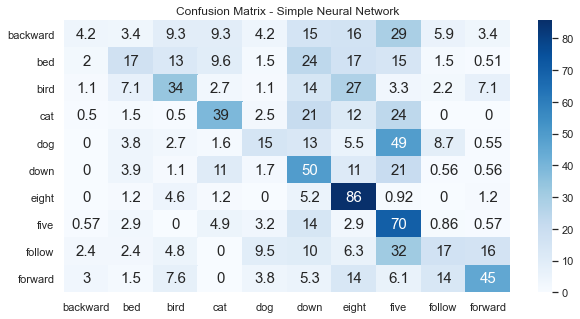

In [215]:
df_cm = pd.DataFrame(conf_matrix*100)
heatmapper(df_cm, "Confusion Matrix - Simple Neural Network")

## B) One Hidden Layer NN

In [223]:
cm_onehidden = conf_mat(one_hidden_net)

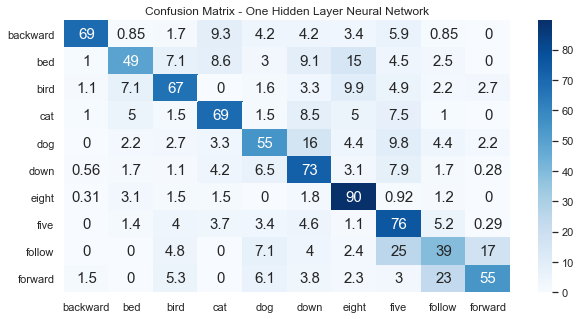

In [224]:
df_cm_onehidden = pd.DataFrame(cm_onehidden*100)
heatmapper(df_cm_onehidden, "Confusion Matrix - One Hidden Layer Neural Network")

## C) Three Hidden Layers NN

In [225]:
cm_3hidden = conf_mat(three_hidden_net)

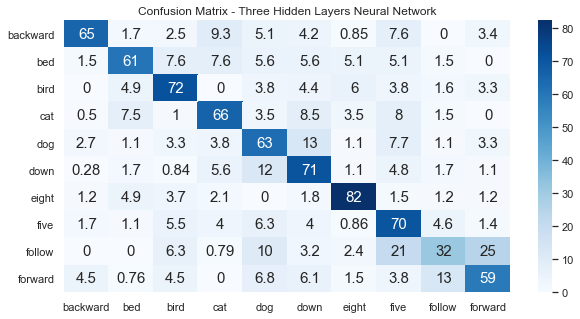

In [226]:
df_cm_3hidden = pd.DataFrame(cm_3hidden*100)
heatmapper(df_cm_3hidden, "Confusion Matrix - Three Hidden Layers Neural Network")

# VIII. Misclassified Data

In [183]:
labels, probas = net.inference(X_test_10_standard)

In [184]:
df_labels = pd.DataFrame({"predictions" : labels})
df_labels["real"] = Y_test_10
df_labels

,predictions,real
0,3,0
1,6,0
2,6,0
3,6,0
4,1,0
...,...,...
2165,6,9
2166,9,9
2167,6,9
2168,5,9


We notice here that the first audio file in the test dataset is misclassified. Let us see its spectrogram and hear it.

In [185]:
open("test-names.txt", "r").read().splitlines()[0]

'backward/bde0f20a_nohash_3.wav'

### Spectrogram

Text(0.5, 1.0, 'Spectrogram: backward')

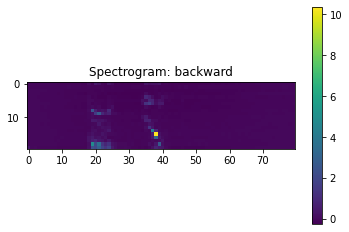

In [187]:
sn.reset_orig()
image = X_test_10_standard[0, :].reshape(20, 80)
plt.imshow(image)
plt.colorbar()
plt.title(f"Spectrogram: {words[Y_test[0]]}")

# IX. Accuracy Comparison

### Train Accuracies

In [188]:
d = {
    'Standardized Data':["64.94%", "89.32%", "88.43%"],
    'L1-Normalized Data':["29.81%", "40.31%", "48.18%"],
    'L2-Normalized Data':["46.84%", "81.96%", "99.21%"],
    'Classifiers': ["Simple NN", "One Hidden Layer NN", "Three Hidden Layers NN"]
}

print("Training Accuracies - Mini Batch")

df = pd.DataFrame(d)
df.set_index('Classifiers')

Training Accuracies - Mini Batch


,Standardized Data,L1-Normalized Data,L2-Normalized Data
Classifiers,,,
Simple NN,64.94%,29.81%,46.84%
One Hidden Layer NN,89.32%,40.31%,81.96%
Three Hidden Layers NN,88.43%,48.18%,99.21%


### Test Accuracies

In [189]:
d = {
    'Standardized Data':["41.43%", "62.86%", "59.63%"],
    'L1-Normalized Data':["29.54%", "40.09%", "47.33%"],
    'L2-Normalized Data':["45.25%", "67.93%", "66.87%"],
    'Classifiers': ["Simple NN", "One Hidden Layer NN", "Three Hidden Layers NN"]
}

print("Testing Accuracies - Mini Batch")

df = pd.DataFrame(d)
df.set_index('Classifiers')

Testing Accuracies - Mini Batch


,Standardized Data,L1-Normalized Data,L2-Normalized Data
Classifiers,,,
Simple NN,41.43%,29.54%,45.25%
One Hidden Layer NN,62.86%,40.09%,67.93%
Three Hidden Layers NN,59.63%,47.33%,66.87%


# X. Weight Visualization

Text(0.5, 1.0, 'Weights: backward')

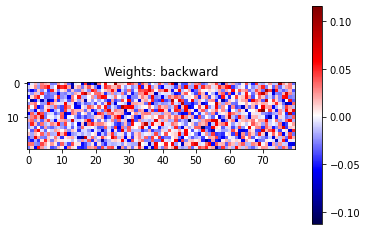

In [68]:
w = net.weights[0]
w0 = w[:, 0].reshape(20, 80)

plt.imshow(w0, cmap="seismic")
plt.colorbar()
plt.title(f"Weights: {words[Y_test[0]]}")

### Spectrogram

Text(0.5, 1.0, 'Spectrogram: backward')

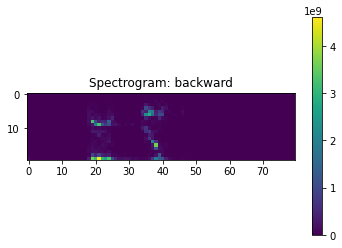

In [69]:
image = X_test[0, :].reshape(20, 80)
plt.imshow(image)
plt.colorbar()
plt.title(f"Spectrogram: {words[Y_test[0]]}")